In [8]:
import kagglehub
path = kagglehub.dataset_download("aryan208/student-habits-and-academic-performance-dataset")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/student-habits-and-academic-performance-dataset


**Loading the Dataset**

In [12]:
import pandas as pd
import os

data_path = os.path.join(path, "enhanced_student_habits_performance_dataset", "enhanced_student_habits_performance_dataset.csv")
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (80000, 31)


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


**Exploratory Data Analysis**

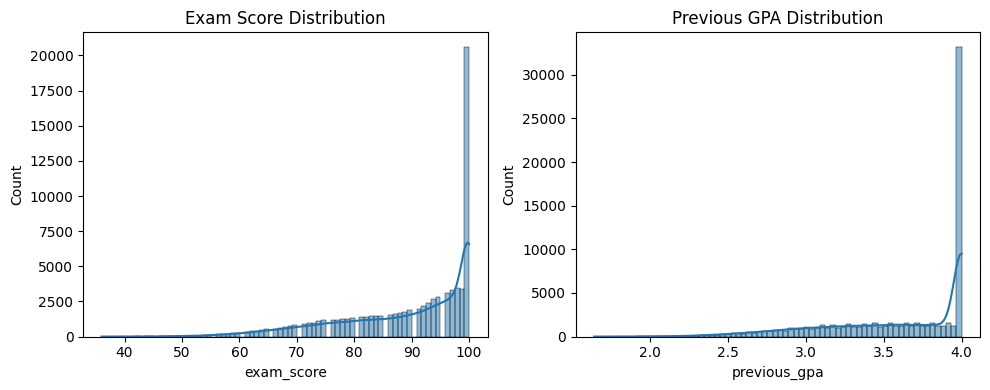

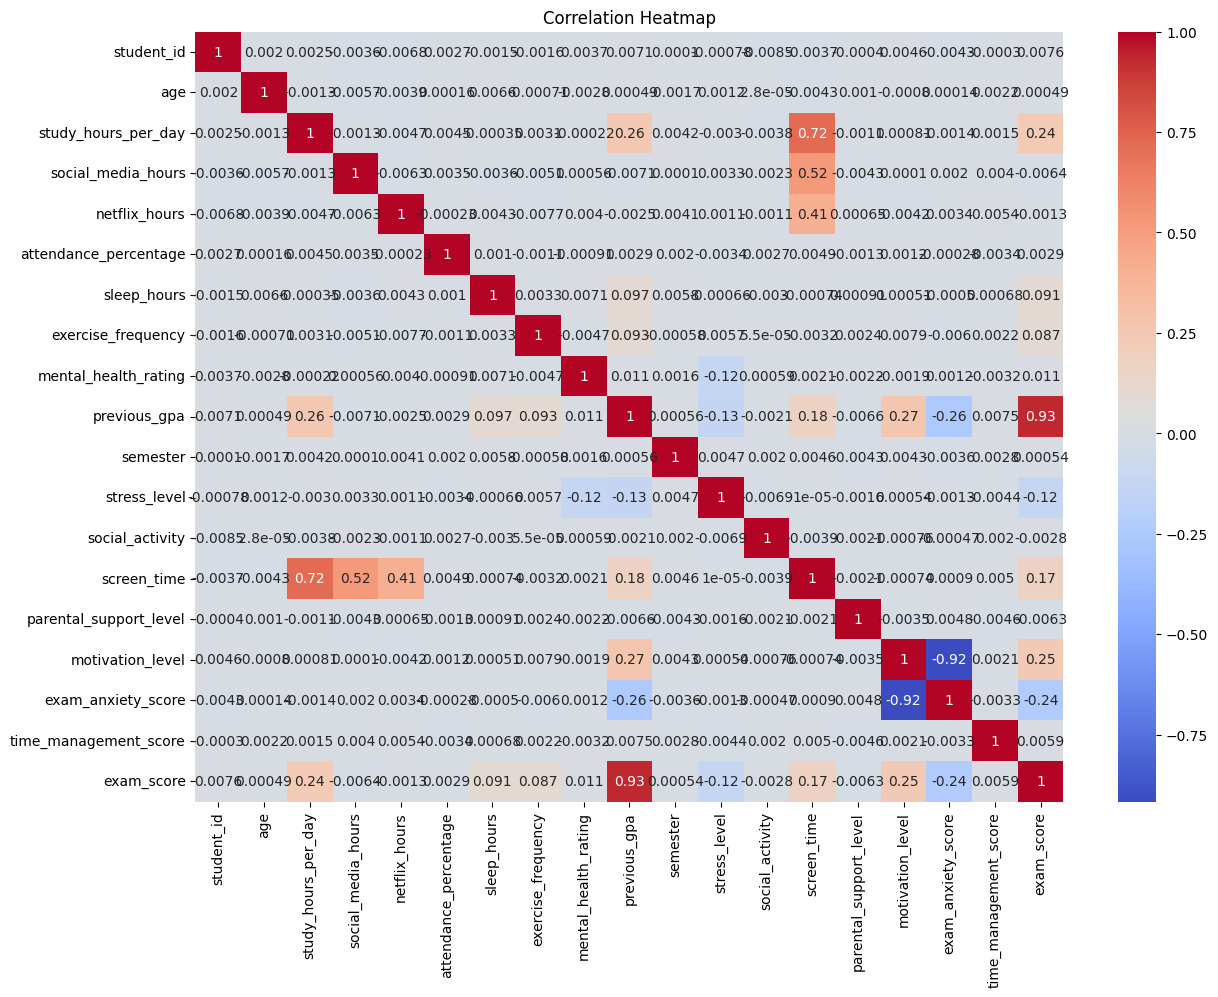

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distributions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['exam_score'], kde=True)
plt.title("Exam Score Distribution")

plt.subplot(1,2,2)
sns.histplot(df['previous_gpa'], kde=True)
plt.title("Previous GPA Distribution")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Preprocessing**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Dropping ID
df = df.drop('student_id', axis=1)

# Label encoding for categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Features and targets
X = df.drop(['exam_score', 'previous_gpa'], axis=1)
y_exam = df['exam_score']
y_gpa = df['previous_gpa']

# Making train and test split
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_exam, test_size=0.2, random_state=42)
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y_gpa, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_e = scaler.fit_transform(X_train_e)
X_test_e = scaler.transform(X_test_e)
X_train_g = scaler.fit_transform(X_train_g)
X_test_g = scaler.transform(X_test_g)


**Training Models**

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Model: {label}")
    print("MSE:", mean_squared_error(y_test, preds))
    print("R² Score:", r2_score(y_test, preds))
    print("-" * 40)

models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ridge Regression": Ridge()
}

print("🔍 Evaluating for Exam Score:")
for name, model in models.items():
    evaluate(model, X_train_e, y_train_e, X_test_e, y_test_e, name)

print("🔍 Evaluating for Previous GPA:")
for name, model in models.items():
    evaluate(model, X_train_g, y_train_g, X_test_g, y_test_g, name)


🔍 Evaluating for Exam Score:
Model: Random Forest
MSE: 112.26966921875
R² Score: 0.1707585501486204
----------------------------------------
Model: Gradient Boosting
MSE: 108.9238270349531
R² Score: 0.19547146720602881
----------------------------------------
Model: Ridge Regression
MSE: 112.8066234511594
R² Score: 0.16679252166305114
----------------------------------------
🔍 Evaluating for Previous GPA:
Model: Random Forest
MSE: 0.172479672786875
R² Score: 0.19717901617304767
----------------------------------------
Model: Gradient Boosting
MSE: 0.16623069911303795
R² Score: 0.22626538392687345
----------------------------------------
Model: Ridge Regression
MSE: 0.17310439230406413
R² Score: 0.1942712072161893
----------------------------------------


**Visualizing feature importances**

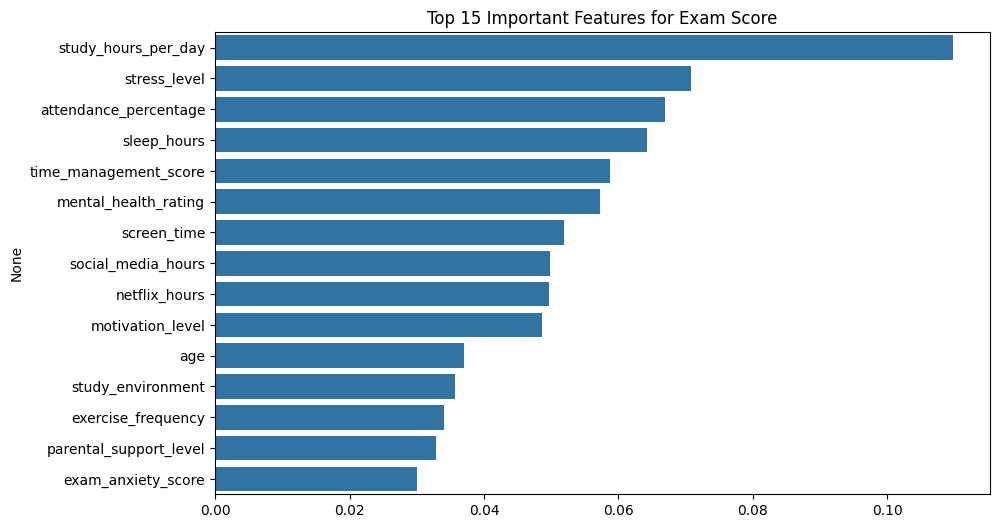

In [16]:
rf = RandomForestRegressor()
rf.fit(X, y_exam)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Important Features for Exam Score")
plt.show()
